# Final Model Testing


## Data Download


In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format

In [ ]:
def import_data(file_path):
    drive.mount('/content/drive')

    try:
        data = pd.read_csv(file_path)
        print("File loaded successfully!")
        return data
    except:
        print(f"Failed to load file!")
        return None

In [ ]:
# If you wish to run the code below locally for testing - please download the files and make the replacements listed below:
import pandas as pd
import os

def import_data(file_name):
    # Get the current working directory
    current_directory = os.getcwd()

    # Set the folder names - change "additional_path_to_data_folder" with your own path:
    data_folder = os.path.join(current_directory, 'additional_path_to_data_folder')  # Replace with the actual folder name

    # Construct the full file path
    file_path = os.path.join(data_folder, file_name)

    try:
        data = pd.read_csv(file_path)
        print("File loaded successfully!")
        return data
    except Exception as e:
        print(f"Failed to load file: {e}")
        return None

# Specify the CSV file name
file_name = 'MetroPT3(AirCompressor).csv'
data = import_data(file_name)

# Display the first few rows of the dataframe
if data is not None:
    print(data.head())

In [ ]:
file_path = '/content/drive/MyDrive/Career/GT Masters/DVA Group Project/Proposal/MetroPT3(AirCompressor).csv'
data = import_data(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
File loaded successfully!


,Unnamed: 0,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
0,0,2020-02-01 00:00:00,-0.01,9.36,9.34,-0.02,9.36,53.60,0.04,1.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00
1,10,2020-02-01 00:00:10,-0.01,9.35,9.33,-0.02,9.35,53.68,0.04,1.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00
2,20,2020-02-01 00:00:19,-0.01,9.34,9.32,-0.02,9.34,53.60,0.04,1.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00
3,30,2020-02-01 00:00:29,-0.01,9.33,9.31,-0.02,9.33,53.42,0.04,1.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00
4,40,2020-02-01 00:00:39,-0.01,9.32,9.30,-0.02,9.32,53.48,0.04,1.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00


In [ ]:
data['timestamp'] = pd.to_datetime(data['timestamp'])
data.describe()

## Data Labeling

In [ ]:
failure_data = pd.DataFrame({
    'Start Time': ['4/18/2020 0:00', '5/29/2020 23:30', '6/5/2020 10:00', '7/15/2020 14:30'],
    'End Time': ['4/18/2020 23:59', '5/30/2020 6:00', '6/7/2020 14:30', '7/15/2020 19:00']})


failure_data['Start Time'] = pd.to_datetime(failure_data['Start Time'])
failure_data['End Time'] = pd.to_datetime(failure_data['End Time'])

conditions = [
    (data['timestamp'] >= failure_data.iloc[0]['Start Time']) & (data['timestamp'] <= failure_data.iloc[0]['End Time']),
    (data['timestamp'] >= failure_data.iloc[1]['Start Time']) & (data['timestamp'] <= failure_data.iloc[1]['End Time']),
    (data['timestamp'] >= failure_data.iloc[2]['Start Time']) & (data['timestamp'] <= failure_data.iloc[2]['End Time']),
    (data['timestamp'] >= failure_data.iloc[3]['Start Time']) & (data['timestamp'] <= failure_data.iloc[3]['End Time']),
]

choices = [1, 1, 1, 1]

# Assign labels
data['label'] = np.select(conditions, choices, default=0)

In [ ]:
data['label'].value_counts()

,count
label,
0,1486994
1,29954


## Feature Importance

Test Set Accuracy: 0.99
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     17995
           1       0.97      0.99      0.98      8964

    accuracy                           0.99     26959
   macro avg       0.98      0.99      0.98     26959
weighted avg       0.99      0.99      0.99     26959

AUC-ROC: 0.9877048963350546
F1 score: 0.9793604491166272

Logistic Regression Coefficients:
TP2               -1.72
TP3                0.00
H1                -2.12
DV_pressure        2.59
Reservoirs        -0.13
Oil_temperature    3.43
Motor_current     -1.25
COMP              -5.17
DV_eletric        -6.75
Towers            -0.02
MPG               -2.62
LPS                3.10
Pressure_switch    1.26
Oil_level          2.19
Caudal_impulses    1.64
dtype: float64


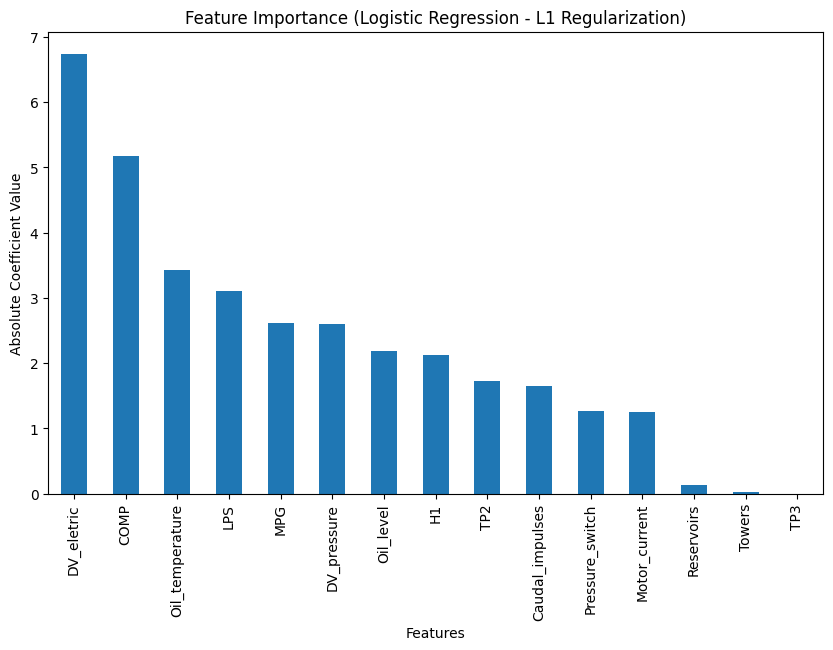

Cross-Validation Accuracy: 0.97 ± 0.03


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, f1_score
from imblearn.under_sampling import RandomUnderSampler
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt

# Assuming your data is in a DataFrame called 'data' and 'label' is your target variable
X = data[['TP2', 'TP3', 'H1', 'DV_pressure', 'Reservoirs', 'Oil_temperature', 'Motor_current', 'COMP', 'DV_eletric', 'Towers', 'MPG', 'LPS', 'Pressure_switch', 'Oil_level', 'Caudal_impulses']]
y = data['label']

# Identify binary and continuous columns
binary_cols = ['COMP', 'DV_eletric', 'Towers', 'MPG', 'LPS', 'Pressure_switch', 'Oil_level', 'Caudal_impulses']
continuous_cols = [col for col in X.columns if col not in binary_cols]

# Create transformers
continuous_transformer = StandardScaler()
binary_transformer = FunctionTransformer(lambda x: x)

# Create column transformer
preprocessor = ColumnTransformer(
    transformers=[('continuous', continuous_transformer, continuous_cols),
                  ('binary', binary_transformer, binary_cols)])

# Apply undersampling to balance classes (using RandomUnderSampler for speed)
undersampler = RandomUnderSampler(random_state=42, sampling_strategy=0.5)
X_resampled, y_resampled = undersampler.fit_resample(X, y)

# Transform the resampled data
X_transformed = preprocessor.fit_transform(X_resampled)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y_resampled, test_size=0.3, random_state=42)

# Train Logistic Regression model with L1 regularization (similar to Lasso)
log_reg = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
log_reg.fit(X_train, y_train)

# Get predictions on the test set
y_pred = log_reg.predict(X_test)

# Evaluate accuracy and other metrics on the test set
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Set Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred))

# Display feature importance (coefficients of the logistic regression)
log_reg_coefficients = pd.Series(log_reg.coef_[0], index=list(continuous_cols) + list(binary_cols))
print("\nLogistic Regression Coefficients:")
print(log_reg_coefficients)

# Visualize feature importance
plt.figure(figsize=(10, 6))
log_reg_coefficients.abs().sort_values(ascending=False).plot(kind='bar')
plt.title('Feature Importance (Logistic Regression - L1 Regularization)')
plt.ylabel('Absolute Coefficient Value')
plt.xlabel('Features')
plt.show()

# Cross-validation score to assess model stability
cv_score = cross_val_score(log_reg, X_transformed, y_resampled, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy: {cv_score.mean():.2f} ± {cv_score.std():.2f}")

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': np.logspace(-3, 1, 10)}  # Range: 0.001 to 10
grid = GridSearchCV(LogisticRegression(penalty='l1', solver='liblinear', random_state=42),
                    param_grid, cv=5, scoring='f1')  # Use F1 due to class imbalance
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
print("Best C:", grid.best_params_['C'])

# Feature importance
best_coeffs = pd.Series(best_model.coef_[0], index=list(continuous_cols) + list(binary_cols))
non_zero_best = best_coeffs[best_coeffs != 0]
print("Selected Features (Best Lasso):\n", non_zero_best.sort_values(ascending=False))

Best C: 1.2915496650148828
Selected Features (Best Lasso):
 Oil_temperature    3.44
LPS                3.16
DV_pressure        2.60
Oil_level          2.47
Caudal_impulses    1.82
Pressure_switch    1.32
Towers            -0.02
Reservoirs        -0.12
Motor_current     -1.25
TP2               -1.74
H1                -2.20
MPG               -2.98
COMP              -5.34
DV_eletric        -7.42
dtype: float64


## Pre-Failure Labeling

In [ ]:
df = data.copy(deep=True)

failure_periods = [
    ("2020-04-18 00:00", "2020-04-18 23:59"),
    ("2020-05-29 23:30", "2020-05-30 06:30"),
    ("2020-06-05 10:00", "2020-06-07 14:30"),
    ("2020-07-15 14:30", "2020-07-15 19:00")
]

df['pre_failure_flag'] = 0  # Initialize column

# Loop through failure periods
for start, end in failure_periods:
    failure_start = pd.to_datetime(start)
    pre_failure_start = failure_start - pd.Timedelta(days=7)
    pre_failure_end = failure_start

    # Mark timestamps within 7 days prior to the start time
    mask = (df['timestamp'] >= pre_failure_start) & (df['timestamp'] < pre_failure_end)
    df.loc[mask, 'pre_failure_flag'] = 1

df.head()

,Unnamed: 0,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses,label,pre_failure_flag
0,0,2020-02-01 00:00:00,-0.01,9.36,9.34,-0.02,9.36,53.60,0.04,1.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00,0,0
1,10,2020-02-01 00:00:10,-0.01,9.35,9.33,-0.02,9.35,53.68,0.04,1.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00,0,0
2,20,2020-02-01 00:00:19,-0.01,9.34,9.32,-0.02,9.34,53.60,0.04,1.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00,0,0
3,30,2020-02-01 00:00:29,-0.01,9.33,9.31,-0.02,9.33,53.42,0.04,1.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00,0,0
4,40,2020-02-01 00:00:39,-0.01,9.32,9.30,-0.02,9.32,53.48,0.04,1.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00,0,0


## Random Forest Model Training

Post sampling split:
X 371828
y 371828
Resampled class distribution: Counter({0: 185914, 1: 185914})
Threshold: 0.00 | Precision: 0.50 | Recall: 1.00 | F1: 0.67
Threshold: 0.05 | Precision: 0.56 | Recall: 0.97 | F1: 0.71
Threshold: 0.10 | Precision: 0.60 | Recall: 0.93 | F1: 0.73
Threshold: 0.15 | Precision: 0.64 | Recall: 0.90 | F1: 0.75
Threshold: 0.20 | Precision: 0.66 | Recall: 0.88 | F1: 0.75
Threshold: 0.25 | Precision: 0.69 | Recall: 0.85 | F1: 0.76
Threshold: 0.30 | Precision: 0.71 | Recall: 0.82 | F1: 0.76
Threshold: 0.35 | Precision: 0.74 | Recall: 0.80 | F1: 0.77
Threshold: 0.40 | Precision: 0.76 | Recall: 0.78 | F1: 0.77
Threshold: 0.45 | Precision: 0.78 | Recall: 0.76 | F1: 0.77
Threshold: 0.50 | Precision: 0.81 | Recall: 0.74 | F1: 0.77
Threshold: 0.55 | Precision: 0.83 | Recall: 0.72 | F1: 0.77
Threshold: 0.60 | Precision: 0.86 | Recall: 0.69 | F1: 0.77
Threshold: 0.65 | Precision: 0.88 | Recall: 0.68 | F1: 0.76
Threshold: 0.70 | Precision: 0.91 | Recall: 0.66 | F1: 0.76

<Figure size 1000x600 with 0 Axes>

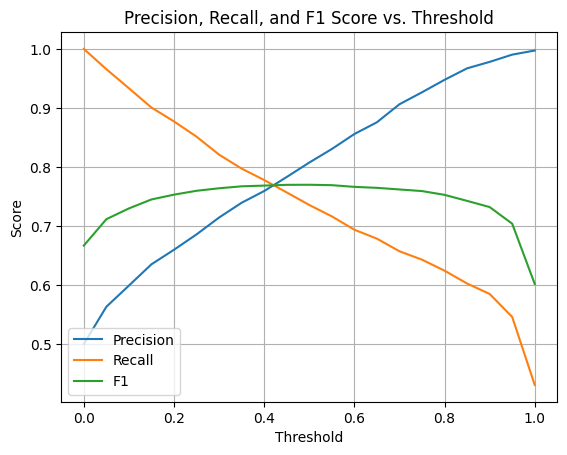

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support
from imblearn.under_sampling import NearMiss
from collections import Counter

# Assuming df is your DataFrame
X = df[['TP2', 'H1', 'DV_pressure', 'Oil_temperature', 'Motor_current', 'COMP', 'DV_eletric', 'MPG', 'LPS', 'Pressure_switch', 'Oil_level', 'Caudal_impulses']]
y = df["pre_failure_flag"]

# Apply NearMiss to undersample
nm_undersampler = NearMiss(sampling_strategy=1)
X_resampled, y_resampled = nm_undersampler.fit_resample(X, y)

print("Post sampling split:")
print("X", len(X_resampled))
print("y", len(y_resampled))
print("Resampled class distribution:", Counter(y_resampled))

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.3, random_state=42
)

# Train the Random Forest model
rf_model = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=100)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Get predicted probabilities (for the positive class "1")
y_prob = rf_model.predict_proba(X_test)[:, 1]

# Evaluate model at each threshold
thresholds = np.arange(0.0, 1.05, 0.05)
scores = []

for t in thresholds:
    y_pred_thresh = (y_prob >= t).astype(int)
    precision, recall, f1, _ = precision_recall_fscore_support(
        y_test, y_pred_thresh, average='binary'
    )
    scores.append((precision, recall, f1))
    print(f"Threshold: {t:.2f} | Precision: {precision:.2f} | Recall: {recall:.2f} | F1: {f1:.2f}")

# Convert to DataFrame
scores_df = pd.DataFrame(scores, columns=["Precision", "Recall", "F1"], index=thresholds)

# Plot the metrics vs. thresholds
plt.figure(figsize=(10, 6))
scores_df.plot()
plt.title("Precision, Recall, and F1 Score vs. Threshold")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.grid(True)
plt.legend(loc='lower left')
plt.show()


In [ ]:
best_idx = scores_df['F1'].idxmax()
print(f"Best threshold based on F1 score: {best_idx:.2f}")

Best threshold based on F1 score: 0.50


## Classification Metrics and Training Results

In [ ]:
# Define your custom threshold
threshold = 0.50
y_pred_thresh = (y_prob >= threshold).astype(int)  # Convert probabilities to binary class labels

# Output the classification report based on the custom threshold
print(f"Classification report for threshold {threshold}:")
print(classification_report(y_test, y_pred_thresh))

Classification report for threshold 0.5:
              precision    recall  f1-score   support

           0       0.76      0.82      0.79     55704
           1       0.81      0.74      0.77     55845

    accuracy                           0.78    111549
   macro avg       0.78      0.78      0.78    111549
weighted avg       0.78      0.78      0.78    111549



## Random Forest Model Testing - Full Results Generation

In [ ]:
# The 14 features used during training
selected_features_cv = ['TP2', 'H1', 'DV_pressure', 'Oil_temperature', 'Motor_current', 'COMP', 'DV_eletric', 'MPG', 'LPS', 'Pressure_switch', 'Oil_level', 'Caudal_impulses']
# Copy features and timestamp
X_full = df[selected_features_cv].copy()
timestamps = df['timestamp']
# Predict probabilities and labels on full dataset
y_full_prob = rf_model.predict_proba(X_full)[:, 1]
y_full_pred = (y_full_prob >= 0.45).astype(int)  # use your threshold
results_df = pd.DataFrame({
    'timestamp': timestamps,
    'y_prob': y_full_prob,
    'y_pred': y_full_pred,
    'actual': df['label']  # if you want to include the true label
})



## Failure Predicitions Window Generation

In [ ]:
import pandas as pd

# Set pandas option to display all rows
pd.set_option('display.max_rows', None)

results_df['timestamp'] = pd.to_datetime(results_df['timestamp'])
results_df = results_df.sort_values('timestamp')
results_df = results_df.set_index('timestamp')

# Average predicted probability over past 7 days
results_df['rolling_7d_avg_prob'] = results_df['y_prob'].rolling('7D').mean()

# Max predicted probability over past 7 days
results_df['rolling_7d_med_prob'] = results_df['y_prob'].rolling('7D').median()

results_df['date'] = results_df.index.date

daily_agg = results_df.groupby('date').agg({
    'y_prob': 'mean',
    'rolling_7d_avg_prob': 'mean',  # Latest 7d avg as of that day
    'rolling_7d_med_prob': 'median',
    'actual': 'max'
}).reset_index()

In [ ]:
daily_agg[daily_agg['y_prob'] > 0.8]
daily_agg['Prediction'] = np.where(daily_agg['y_prob'] > 0.8, 1, 0)

## Final Model CSV

In [ ]:
final_model_output = daily_agg.drop(columns={'rolling_7d_avg_prob', 'rolling_7d_med_prob'})

In [ ]:
filename = 'final_model_output.csv'

# Save the DataFrame to a CSV file
final_model_output.to_csv(filename, index=False)

print(f"DataFrame has been successfully saved to {filename}.")

DataFrame has been successfully saved to final_model_output.csv.


## Plot Outputs

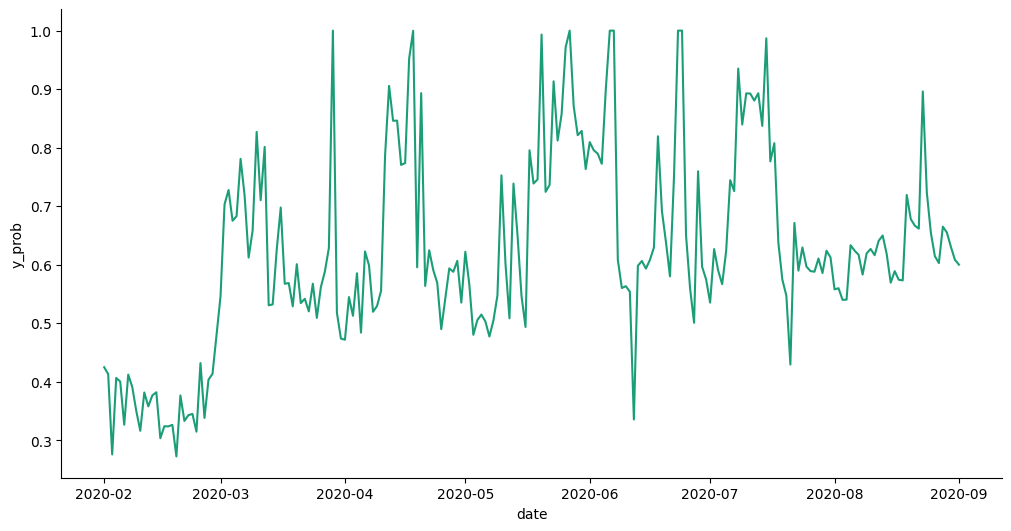

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['y_prob']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = final_model_output.sort_values('date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('y_prob')

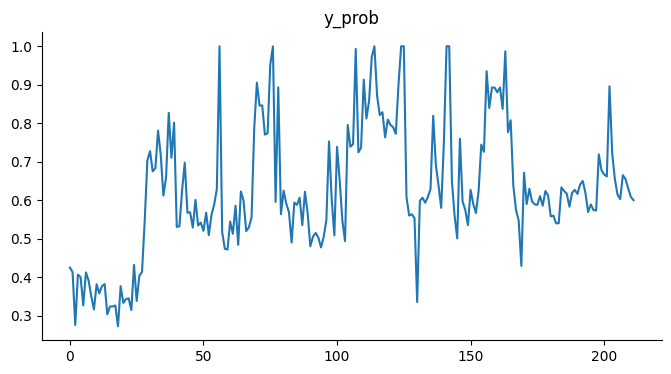

In [ ]:
from matplotlib import pyplot as plt
final_model_output['y_prob'].plot(kind='line', figsize=(8, 4), title='y_prob')
plt.gca().spines[['top', 'right']].set_visible(False)